# Proyecto: Webscrapping página de Banxico

### Andrés Nieto Guadarrama
### 000119266

Librerías necesarias:

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests_html
import pickle
import numpy as np
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

import nltk
import pandas as pd
import numpy as np
from collections import Counter
from nltk.tokenize import RegexpTokenizer

Formato para gráficos:

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

URL con la información de política monetaria de BANXICO: (guardada como tupla)

In [3]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

### Ejercicio 1

In [4]:
#Lectura de la página
with HTMLSession() as sess:
    r = sess.get(url)
r

filename="andres_nieto"
outfile = open(filename,'wb')

In [5]:
mi_dict_auxiliar=defaultdict(list)

tablas=r.html.find("tbody", first=True)
trs=tablas.find("tr")
cont=0
for tr in trs:
    
    fecha=datetime.strptime(tr.find("span",first=True).text, '%d/%m/%y')
    resumen=tr.find("td[class='bmtextview']",first=True).text.rstrip('Texto completo')
    link,*_=tr.find("td[class='bmtextview']",first=True).absolute_links

    if fecha.year>2008:
    
        mi_dict_auxiliar['Fecha'].append(datetime.strptime(fecha.strftime("%y-%m-%d"),"%y-%m-%d"))
        mi_dict_auxiliar['Resumen'].append(resumen)
        mi_dict_auxiliar['Link'].append(link)
    
    elif fecha.month>=2:
        
        mi_dict_auxiliar['Fecha'].append(datetime.strptime(fecha.strftime("%y-%m-%d"),"%y-%m-%d"))
        mi_dict_auxiliar['Resumen'].append(resumen)
        mi_dict_auxiliar['Link'].append(link)
    
    else: 
        
        break
    
df=pd.DataFrame(mi_dict_auxiliar)
banxico_df=df.iloc[::-1]
#-------------------------------------------------DataFrame resultado----------------------------------------------------------
banxico_df.head(5)

,Fecha,Resumen,Link
104,2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
103,2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
102,2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
101,2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
100,2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


# Ejercicio 2

In [6]:
aux=banxico_df['Resumen'].str.extract(r"(mantiene|incrementa|disminuye)",expand=False)
banxico_df_ej2=banxico_df
banxico_df_ej2.insert(loc=3,column="Categoría",value=list(aux))

In [7]:
banxico_df_ej2.head(5)

,Fecha,Resumen,Link,Categoría
104,2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
103,2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
102,2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
101,2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
100,2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


# Ejercicio 3

¿En cuantas decisiones de política monetaria el Banco de México se incrementó, mantuvo o disminuyó la tasa de referencia?

In [8]:
arr=np.array(banxico_df["Categoría"])
llaves=['mantiene','incrementa','disminuye']
diccionario_numero_cambios={l:sum(arr==l) for l in llaves}
diccionario_numero_cambios

{'mantiene': 72, 'incrementa': 18, 'disminuye': 15}

# Ejercicio 4

In [9]:
'''
Gráfica 1
'''

cat=[]
for i in list(banxico_df.index):
    if banxico_df["Categoría"][i]=="disminuye":
        cat.append(-1)
    elif banxico_df["Categoría"][i]=="mantiene":
        cat.append(0)
    else:
        cat.append(1)
banxico_df_ej2["cat_values"]=cat

'''
Gráfica 2
'''

df_graficas=pd.DataFrame({"conteo":list(diccionario_numero_cambios.values())},index=list(diccionario_numero_cambios.keys()))


C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Graficación

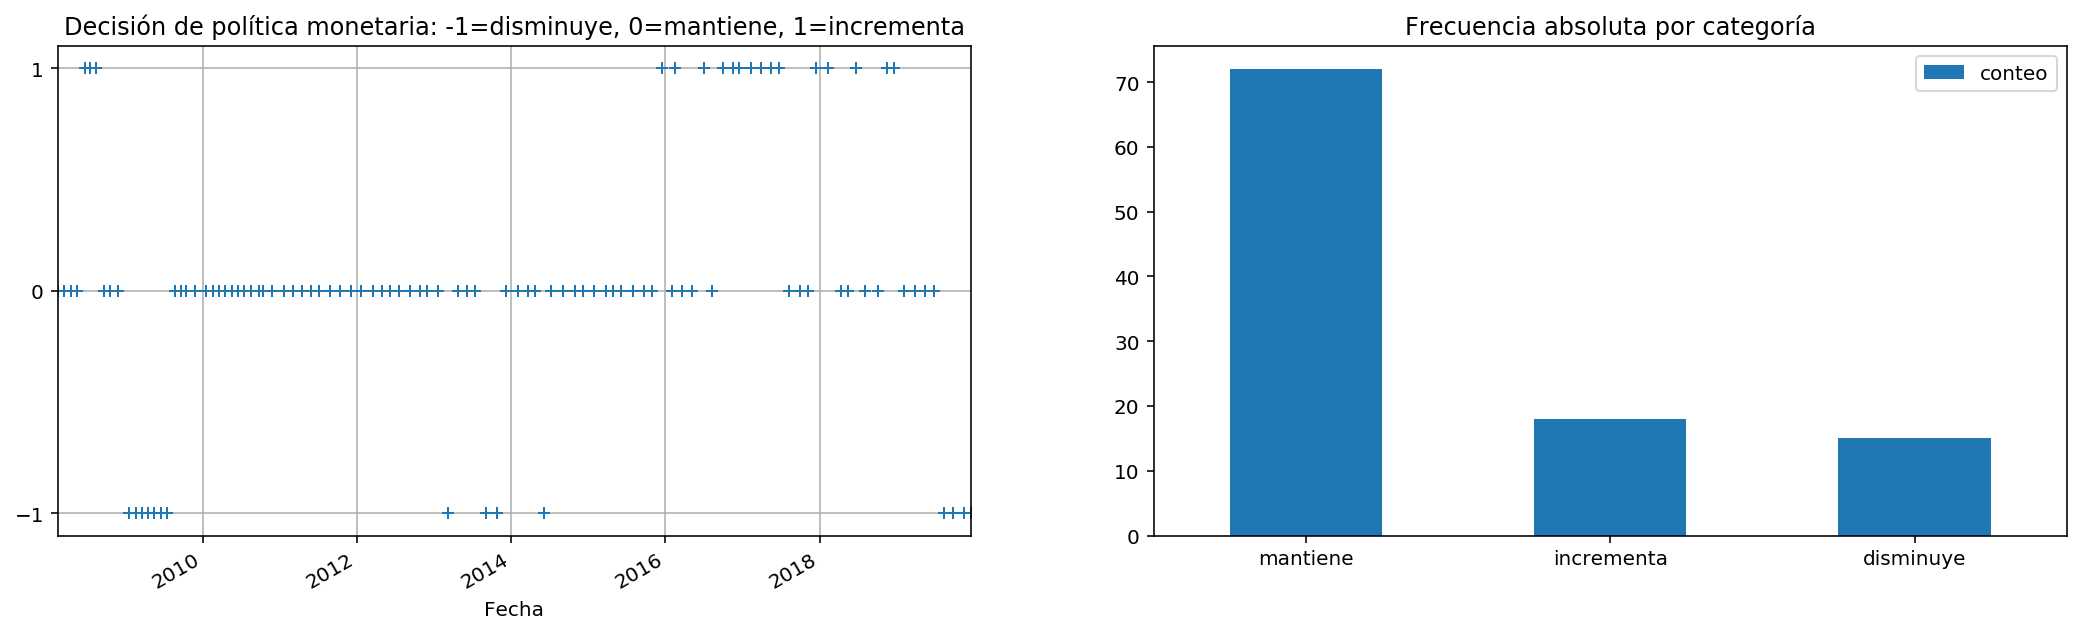

In [10]:

fig, ax = plt.subplots(1,2, figsize=(18, 5))
banxico_df.plot(ax=ax[0],x="Fecha",y="cat_values",style="+",yticks=[-1,0,1],grid=True,title="Decisión de política monetaria: -1=disminuye, 0=mantiene, 1=incrementa")
ax[0].get_legend().remove()
df_graficas.plot.bar(ax=ax[1],rot=0,title="Frecuencia absoluta por categoría")
plt.show()

# Ejercicio 5

In [11]:
df_test=banxico_df

df_test.index=df_test["Fecha"]

grouper = df_test.groupby([pd.Grouper(freq='Y'), 'Categoría'])

df_anual=grouper['Categoría'].count()

df_anual

Fecha       Categoría 
2008-12-31  incrementa     3
            mantiene       7
2009-12-31  disminuye      7
            mantiene       4
2010-12-31  mantiene      11
2011-12-31  mantiene       8
2012-12-31  mantiene       8
2013-12-31  disminuye      3
            mantiene       5
2014-12-31  disminuye      1
            mantiene       7
2015-12-31  incrementa     1
            mantiene       7
2016-12-31  incrementa     5
            mantiene       4
2017-12-31  incrementa     5
            mantiene       3
2018-12-31  incrementa     4
            mantiene       4
2019-12-31  disminuye      4
            mantiene       4
Name: Categoría, dtype: int64

# Ejercicio 6

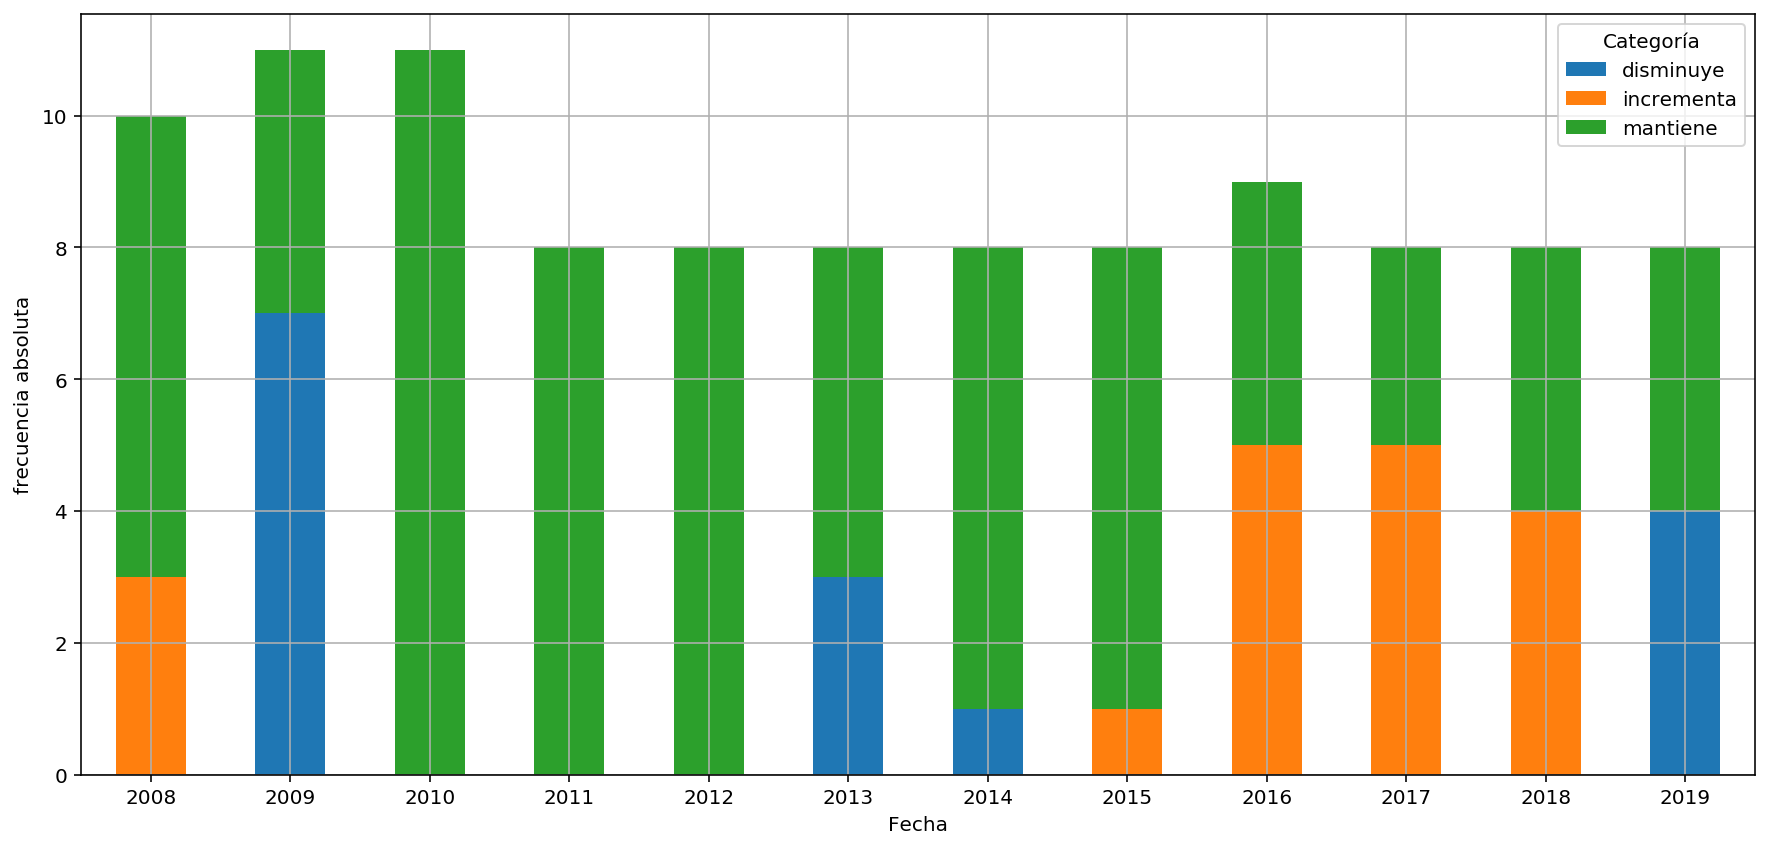

In [12]:
df_anual2=df_anual.unstack('Categoría')
fig2, ax2 = plt.subplots(figsize=(15,7))
df_anual2.plot(rot=0,kind='bar', stacked=True,ax=ax2,grid=True)
ax2.set_xticklabels(list(range(2008,2020)), rotation=0)
ax2.set_ylabel("frecuencia absoluta")
plt.show()

# Creación del archivo .pkl

In [13]:
import pickle
filename="andres_nieto.pkl"

In [14]:
'''
Crearemos dos funciones para almacenar las gráficas en el pickle:
'''

def fig_1(banxico_df,df_graficas):
    fig, ax = plt.subplots(1,2, figsize=(18, 5))
    banxico_df.plot(ax=ax[0],x="Fecha",y="cat_values",style="+",yticks=[-1,0,1],grid=True,title="Decisión de política monetaria: -1=disminuye, 0=mantiene, 1=incrementa")
    ax[0].get_legend().remove()
    df_graficas.plot.bar(ax=ax[1],rot=0,title="Frecuencia absoluta por categoría")
    plt.show()

def fig_2(df_anual):
    df_anual2=df_anual.unstack('Categoría')
    fig2, ax2 = plt.subplots(figsize=(15,7))
    df_anual2.plot(rot=0,kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_xticklabels(list(range(2008,2020)), rotation=0)
    ax2.set_ylabel("frecuencia absoluta")
    plt.show()


In [15]:
'''
Los datos se almacenarán en un diccionario con las siguientes llaves: 
BANXICO: banxico_dataframe. Dataframe con el webscripping y la columna de categoría.
ANUAL: la sub_dataframe con el conteo de las categorías 'disminuye', 'mantiene' o 'incrementa' agrupadas por año.
GRAFICAS: Resume conteo de categorías sin agrupar, para generar la primera gráfica de barras.
figura_1: función para crear la primera figura de la tarea. LLamar con BANXICO y GRAFICAS.
figura_2: función para crear la segunda figura de la tarea. LLamar con ANUAL.

Seguir éste orden al leer el archivo .pkl
'''

"\nLos datos se almacenarán en un diccionario con las siguientes llaves: \nBANXICO: banxico_dataframe. Dataframe con el webscripping y la columna de categoría.\nANUAL: la sub_dataframe con el conteo de las categorías 'disminuye', 'mantiene' o 'incrementa' agrupadas por año.\nGRAFICAS: Resume conteo de categorías sin agrupar, para generar la primera gráfica de barras.\nfigura_1: función para crear la primera figura de la tarea. LLamar con BANXICO y GRAFICAS.\nfigura_2: función para crear la segunda figura de la tarea. LLamar con ANUAL.\n\nSeguir éste orden al leer el archivo .pkl\n"

In [16]:
import dill as pickl
data={"BANXICO":banxico_df,"ANUAL":df_anual,"GRAFICAS":df_graficas,"figura_1":fig_1,"figura_2":fig_2}

In [17]:
with open(filename, "wb") as f:
    pickl.dump(data, f)

### Comprobación (en notebook lectura_pickles.ipynb)

# Segunda parte

### Filtrado de dataframe por categoría

In [18]:
banxico_dataframe_disminuye=banxico_df[banxico_df_ej2["Categoría"]=="disminuye"]
banxico_dataframe_mantiene=banxico_df[banxico_df_ej2["Categoría"]=="mantiene"]
banxico_dataframe_incrementa=banxico_df[banxico_df_ej2["Categoría"]=="incrementa"]

### Lectura de archivos .pdf

In [19]:
import io,os,urllib,PyPDF2
from io import StringIO
from urllib import request

url2=banxico_dataframe_disminuye["Link"].iloc[0]
contenido=request.urlopen(url2).read()

filename = "pdfEexample.pdf"
with open(filename, "wb") as file:
    file.write(contenido) 

#getPDFContent(filename) funciona!

def creaPDF(URL,i,cat):
    '''
    Guardará en carpeta anuncios_cat (cat=disminuye,mantiene,aumenta) 
    los anuncios donde se dio la decisión correspondiente:
    '''
    contenido=request.urlopen(URL).read()
    filename = "anuncios_"+cat+"/"+"anuncio_"+cat+'_'+str(i)+".pdf"
    with open(os.path.normpath(filename), "wb") as file:
        file.write(contenido)
    return filename
    
def getPDFContent(path):
    content = ""
    # carga la información del archivo .pdf a Python
    ruta=os.path.normpath(path)
    with open(ruta,'rb') as f:
        pdfFileObj=f.read()
    pdfReader = PyPDF2.PdfFileReader(ruta)
    # Iteración sobre el número de páginas del pdf
    for i in range(pdfReader.numPages):
    # Extracción y limpieza del texto
        content += pdfReader.getPage(i).extractText() + "\n"
    content=content.replace("\n","").replace("  "," ")
    content=content.lower().replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
    return content[1:len(content)-1:1]

$$\textbf{ADVERTENCIA}$$


                    EJECUTAR ESTE CÓDIGO DEJANDO DESCANSAR A LA COMPUTADORA. TIEMPO APROX. 30 MINS
                EJECUTAR LA SIGUIENTE CELDA SÓLO UNA VEZ (CON EL FIN DE DESCARGAR LOS ARCHIVOS .PDF SOLO UNA VEZ). 
                           PARA EL RESTO DE LAS PRUEBAS USAR LA CELDA POSTERIOR A LA SIGUIENTE 


In [20]:
import io,os,urllib,PyPDF2
from io import StringIO
from urllib import request
import time


# #Creación de carpetas:

import os
directorios=["anuncios_mantiene","anuncios_disminuye","anuncios_incrementa"]
for _dir in directorios:
    if not os.path.exists(_dir):
        os.makedirs(_dir)

#Guardaré en cada lista los Strings correspondientes al anuncio, filtrados por decisión.

Disminuye=[]
Mantiene=[]
Incrementa=[]

#Comienzan los loops.El siguiente código crea el archivo .pdf para cada anuncio de la decisión de política monetaria,
#lo guarda en las carpetas creadas previamente, y lo vuelve a leer desde la computadora para convertirlo a String que 
#se usará para hacer nlp mediante naïve Bayes,

for i in range(len(banxico_dataframe_mantiene)):
    url2=banxico_dataframe_mantiene["Link"].iloc[i]
    path=creaPDF(url2,i,cat="mantiene")
    Mantiene.append(getPDFContent(path))
    time.sleep(30)

for i in range(len(banxico_dataframe_incrementa)):
    url2=banxico_dataframe_incrementa["Link"].iloc[i]
    path=creaPDF(url2,i,cat="incrementa")
    Incrementa.append(getPDFContent(path))
    time.sleep(30)

for i in range(len(banxico_dataframe_disminuye)):
    url2=banxico_dataframe_disminuye["Link"].iloc[i]
    path=creaPDF(url2,i,cat="disminuye")
    Disminuye.append(getPDFContent(path))
    time.sleep(30)

                        Ejecutar la siguiente celda para recuperar las listas con el texto relativo
                  a cada anuncio de política monetaria por clase luego de haber cargado la celda anterior

In [21]:
Disminuye=[]
Mantiene=[]
Incrementa=[]
path=""

for i in range(len(banxico_dataframe_mantiene)):
    cat="mantiene"
    path="anuncios_"+cat+"/"+"anuncio_"+cat+'_'+str(i)+".pdf"
    Mantiene.append(getPDFContent(path))

for i in range(len(banxico_dataframe_incrementa)):
    cat="incrementa"
    path="anuncios_"+cat+"/"+"anuncio_"+cat+'_'+str(i)+".pdf"
    Incrementa.append(getPDFContent(path))

for i in range(len(banxico_dataframe_disminuye)):
    cat="disminuye"
    path="anuncios_"+cat+"/"+"anuncio_"+cat+'_'+str(i)+".pdf"
    Disminuye.append(getPDFContent(path))

# Modelo Naive-Bayes

In [46]:
#Encontrar la matriz de probabilidades condicionales por palabra  

def matriz_conteo(texto):
    work_tokenizer = RegexpTokenizer("[A-z]+")
    tokens = work_tokenizer.tokenize(texto.lower())
    unique_tokens = list(set(tokens))
    gram2 = list(nltk.ngrams(tokens, 2))
    counts = {tok: Counter([g[:-1] for g in gram2 if g[-1] in tok]) for tok in unique_tokens}
    counts = pd.DataFrame(counts).fillna(0)
    return counts,unique_tokens


def conteo_clase(w,base_texto_clase):
    '''
    Ésta función devuelve el conteo de veces que aparece la palabra w en la base de texto
    de la clase dada, el número de veces que aparece la palabra en toda la base de datos, 
    y el tamaño del vocabulario de la clase seleccionada. (Usar notas de clase)
    '''
    
    #1. Cálculo de número de apariciones de w en la base de datos de textos que pertenecen a la categoría dada.
    
    #2. Cálculo del número de palabras que se dijeron en la categoría.
    
    #________________________________________________ -PASOS-___________________________________________________

    # Conteo del número de veces que aparece la parabra 'w' en la base de anuncios de política monetaria
    # pertenecientes a una categoría dada (mantiene, disminuye o aumenta).
    
    T=""
    n_w_clase=0
    for t in base_texto_clase:
        T+=t+" "
    
    matriz_conteo_categoria,tokens_unicos=matriz_conteo(T)
    suma=matriz_conteo_categoria.apply(np.sum, axis=1)
        
    if w in suma.index:
        n_w_clase=suma[w]
    else:
        n_w_clase=0
        
    #2: Vocabulario de categoría.
    
    n_w_total=0
    for tok in suma.index:
        n_w_total+=suma[tok]
    
    if type(n_w_clase)!=int and type(n_w_clase)!=np.float64:
        n_w_clase=n_w_clase[0]
    if type(n_w_total)!=int and type(n_w_total)!=np.float64:
        n_w_total=n_w_total[0]
        
    return n_w_clase,n_w_total

def suavizacion_Laplace(x):
    w=x[0]
    bd_categoria=x[1]
    texto_analizar=x[2]   
    n_w_en_clase,vocabulario_clase=conteo_clase(w,bd_categoria)
    #Vocabulario del tezto a analizar
    work_tokenizer = RegexpTokenizer("[A-z]+")
    tokens = work_tokenizer.tokenize(texto_analizar.lower())
    unique_tokens = list(set(tokens))
    vocabulario_texto=len(unique_tokens)
    #Obtención de las probabilidades condicionales corregidas a través de la suavización de Laplace.
    return (n_w_en_clase+1)/(vocabulario_clase+vocabulario_texto)


def matriz_de_proba_condicional(d,base_texto_clase): #base_texto_clase=Mantiene, Disminuye o Incrementa.
    '''
    Ésta función devuelve una lista con las probabilidades P(w_i^k | Ck) 
    para cada i=1,...,|d| k=1,2,3 tomando a las columnas como categorías.
    Se calculan las probabilidades por palabra con la suavización de Laplace.
    '''
    
    lista_texto=d.split()
    values=[]
    for p in lista_texto:
        values.append(float(suavizacion_Laplace([p,base_texto_clase,d])))
    return values

def matriz_probabilidades_maximas(d,Lista):
    
    '''
    Esta función indica cual fue la categoría que maximiza 
    la probabilidad condicional dado el texto a analizar.
    '''
    
    #Diccionario de probabilidades P(Ck), k=mantiene, disminuye, incrementa.
    llaves=['mantiene','incrementa','disminuye']
    dic_probabilidades_clase={l:diccionario_numero_cambios[l]/len(banxico_df) for l in llaves}
    
    resp=[]
    for i in range(len(Lista)):
        Pr=matriz_de_proba_condicional(d,Lista[i])
        PrCk=dic_probabilidades_clase[llaves[i]]
        r=log(PrCk)+sum(np.log(Pr))
        resp.append(r)
    
    max_i=resp.index(max(resp))
    
    if np.sum(np.array(resp)==resp[max_i])>1:
        print("El texto ingresado no aporta información sobre la futura decisión de política monetaria de BANXICO.")
    else:
        if max_i==0:
            print("El texto analizado pertenece a la categoría MANTENER (el modelo considera más probable que las tasas se mantengan dado el texto analizado)")
        elif max_i==1:
            print("El texto analizado pertenece a la categoría INCREMENTAR (el modelo considera más probable que BANXICO aumente las tasas de interés dado el texto analizado)")
        else:
            print("El texto analizado pertenece a la categoría DISMINUIR (el modelo considera más probable que BANXICO disminuya las tasas de interés dado el texto analizado)")

    M=np.diag(resp)
    df=pd.DataFrame(M)
    df.index=["mantiene","disminuye","incrementa"]
    df=df.rename(columns={n:c for n,c in zip([0,1,2],["mantiene","disminuye","incrementa"])})
    return df
    

# Ejecución del código

In [47]:
%%time
import multiprocessing,math
from multiprocessing import Pool
from math import log

'''
El siguiente código pide al usuario el nombre de un documento de formato .txt y devuelve la matriz de probabilidades
de pertenecer a cada clase, imprimiendo un mensaje que indica la clase a la que pertenece.
'''

#Base de datos de todos los anuncios de politica monetaria:
Lista=[Mantiene,Incrementa,Disminuye]

#Lectura del texto a analizar (leámoslo como archivo .txt):
archivo=input("Nombre del archivo a leer con terminación .txt: ")#Ejemplo: texto_compara.txt
ruta=os.path.normpath(archivo)
with open(ruta) as file:
    d=file.read()
    
d=d.lower().replace("\n","").replace("  "," ").replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")

pool = Pool(processes=6)
R=matriz_probabilidades_maximas(d,Lista)
pool.close()

R

Nombre del archivo a leer con terminación .txt: texto_compara.txt
El texto analizado pertenece a la categoría DISMINUIR (el modelo considera más probable que BANXICO disminuya las tasas de interés dado el texto analizado)
Wall time: 3min 42s


,mantiene,disminuye,incrementa
mantiene,-88.707384,0.000000,0.000000
disminuye,0.000000,-83.244385,0.000000
incrementa,0.000000,0.000000,-81.839665
